In [57]:
import pandas as pd
import plotly.graph_objects as go
from group_data import group_data

In [19]:
df = pd.read_csv("/Users/florian/Documents/github/study/IoT/IoT/output.csv")

In [90]:
df_hour = group_data(df, "h")
df_min = group_data(df, "min")

In [162]:
from datetime import date
date(2022,10,10)

datetime.date(2022, 10, 10)

In [101]:
df_min[df_min["date_time"].astype(str).str.slice(0, 10).str.contains("2022-10-10")].date_time

0        2022-10-10 14:09:00
1        2022-10-10 14:18:00
2        2022-10-10 14:19:00
3        2022-10-10 14:20:00
4        2022-10-10 14:21:00
                 ...        
704053   2022-10-10 22:47:00
704054   2022-10-10 23:02:00
704055   2022-10-10 23:17:00
704056   2022-10-10 23:32:00
704057   2022-10-10 23:47:00
Name: date_time, Length: 1355, dtype: datetime64[ns]

In [112]:
df_hour["date"] = df["date_time"].astype(str).str.slice(0, 10)

In [81]:
test_str = "2022-10-10"

In [105]:
df_hour[df_hour["date"].str.contains(test_str)]["date"]

0         2022-10-10 14:09:26
1         2022-10-10 14:18:26
2         2022-10-10 14:18:47
3         2022-10-10 14:19:07
4         2022-10-10 14:19:26
                 ...         
116356    2022-10-10 22:47:26
116357    2022-10-10 23:02:33
116358    2022-10-10 23:17:39
116359    2022-10-10 23:32:45
116360    2022-10-10 23:47:53
Name: date, Length: 349, dtype: object

In [133]:
df_paul = pd.read_csv("/Users/florian/Documents/github/study/IoT/IoT/aggregated_hourly.csv")
df_paul[df_paul["date_time"].str.slice(0, 10).str.contains("2022-10-10")].date_time

0         2022-10-10 14:00:00
1         2022-10-10 15:00:00
2         2022-10-10 16:00:00
3         2022-10-10 17:00:00
4         2022-10-10 18:00:00
                 ...         
138633    2022-10-10 19:00:00
138634    2022-10-10 20:00:00
138635    2022-10-10 21:00:00
138636    2022-10-10 22:00:00
138637    2022-10-10 23:00:00
Name: date_time, Length: 307, dtype: object

In [155]:
input_date = "2022-10-10"
input_device = "hka-aqm-a014"

filtered_data = df_hour[(df_hour["device_id"].astype(str) == input_device) & (df_hour["date_time"].astype(str).str.slice(0, 10).str.contains(str(input_date)))]

In [157]:
filtered_data["tmp"]

0    23.902895
1    24.793750
2    24.856000
3    24.860000
4    24.824000
5    24.710000
6    24.490000
7    24.385000
8    24.140000
9    23.995000
Name: tmp, dtype: float64

In [154]:
test = df_hour[(df_hour["date"].astype(str) == "2022-10-10") & (df_hour["date_time"].astype(str).str.slice(0, 10).str.contains("2022-10-10"))]
import plotly.express as px

px.scatter(test, x="date_time", y="tmp")

In [150]:
input_device = "hka-aqm-a014"
input_date = "2022-10-10"

fig_temp = go.Figure()
fig_temp.add_trace(
    go.Scatter(
        x= df_hour[(df_hour["device_id"].astype(str) == input_device) & (df_hour["date_time"].astype(str).str.slice(0, 10).str.contains(input_date))]["date_time"],
        y= df_hour[(df_hour["device_id"] == input_device) & (df_hour["date_time"].astype(str).str.slice(0, 10).str.contains(input_date))]["tmp"],
        name= "temp_hour",
        mode= "lines+markers"
    )
)

In [147]:
df_hour[(df_hour["device_id"] == "hka-aqm-a014") & (df_hour["date_time"].astype(str).str.slice(0, 10).str.contains("2022-10-10"))]["date_time"]

0   2022-10-10 14:00:00
1   2022-10-10 15:00:00
2   2022-10-10 16:00:00
3   2022-10-10 17:00:00
4   2022-10-10 18:00:00
5   2022-10-10 19:00:00
6   2022-10-10 20:00:00
7   2022-10-10 21:00:00
8   2022-10-10 22:00:00
9   2022-10-10 23:00:00
Name: date_time, dtype: datetime64[ns]

In [149]:
df_hour[(df_hour["device_id"] == input_device) & (df_hour["date_time"].astype(str).str.slice(0, 10).str.contains(input_date))]["tmp"]

0    23.902895
1    24.793750
2    24.856000
3    24.860000
4    24.824000
5    24.710000
6    24.490000
7    24.385000
8    24.140000
9    23.995000
Name: tmp, dtype: float64

In [114]:
fig_1 = go.Figure()

fig_1.add_trace(
    go.Scatter(
        x= df_hour[df_hour["date"] == "2022-10-10"]["date_time"],
        y= df_hour[df_hour["date"] == "2022-10-10"]["tmp"],
        name= "temp_hour",
        mode= "lines+markers"
    )
)
fig_1.update_layout(plot_bgcolor= "white", title= "<b>Temperature in °C at the sensor overt time</b>", xaxis_title= "Time", yaxis_title= "Temperature in °C")
fig_1.update_xaxes(showline= True, linecolor= "grey", linewidth= 2, gridcolor= "LightGray")
fig_1.update_yaxes(showline= True, linecolor= "grey", linewidth= 2, gridcolor= "LightGray")
fig_1.show()

In [58]:
fig_temp = go.Figure()

fig_1.add_trace(
    go.Scatter(
        x= df_hour["date_time"].tail(24),
        y= df_hour["tmp"].tail(24),
        name= "temp_hour",
        mode= "lines+markers"
    )
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


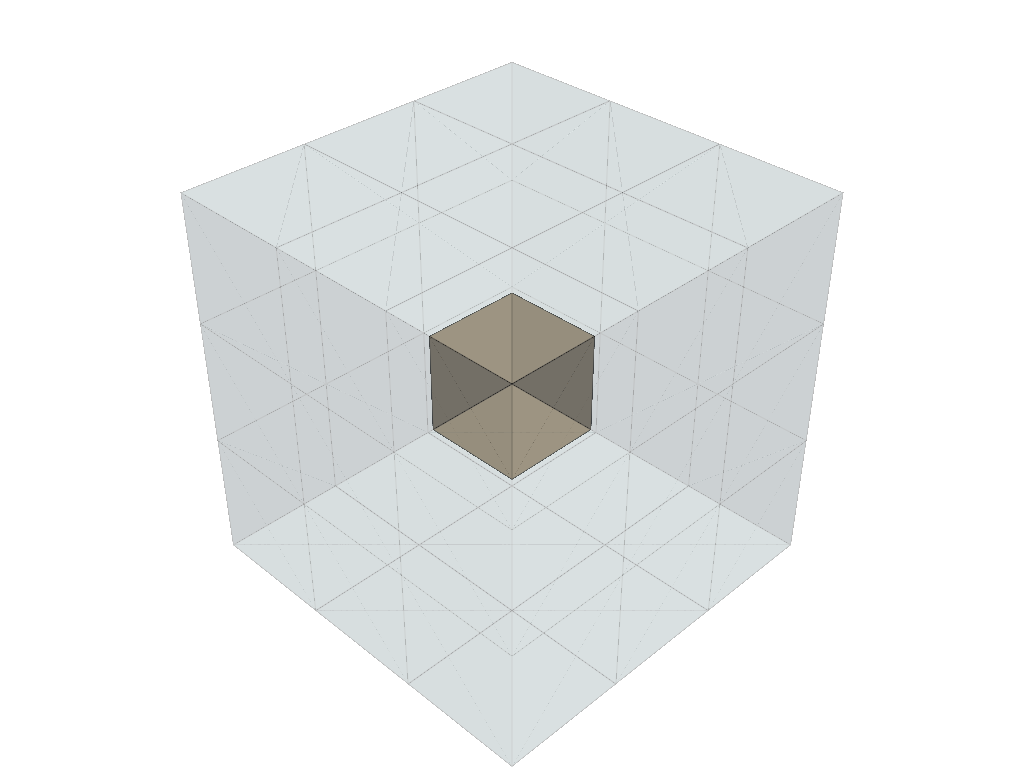

In [2]:
import pyvista as pv

mesh = pv.Box(level= 2)

clipped = pv.Box([0, 0.5, 0, 0.5, 0, 0.5])


plotter = pv.Plotter()
plotter.add_mesh(mesh, cmap="coolwarm", opacity= 0.15, show_edges= True)
plotter.add_mesh(clipped, color="tan", opacity= 0.5, show_edges= True)
plotter.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


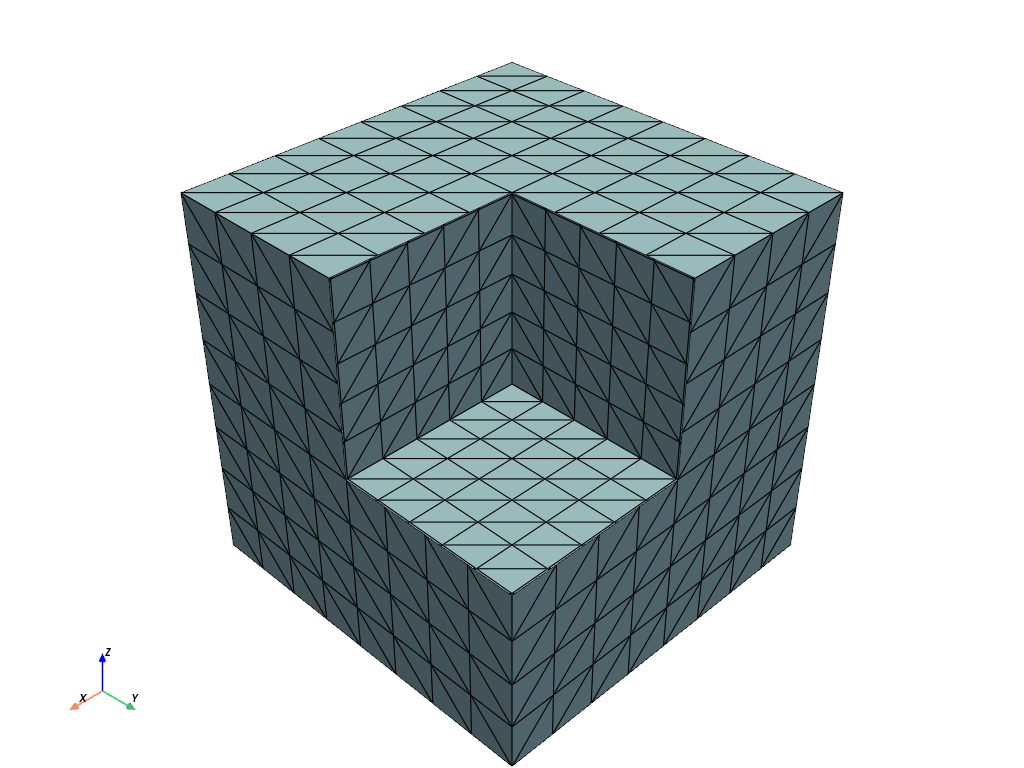

In [84]:
import pyvista as pv
cube = pv.Cube().triangulate().subdivide(3)


clipped_cube = cube.clip_box([0, 1, 0, 1, 0, 1])
clipped_cube.plot(show_edges= True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


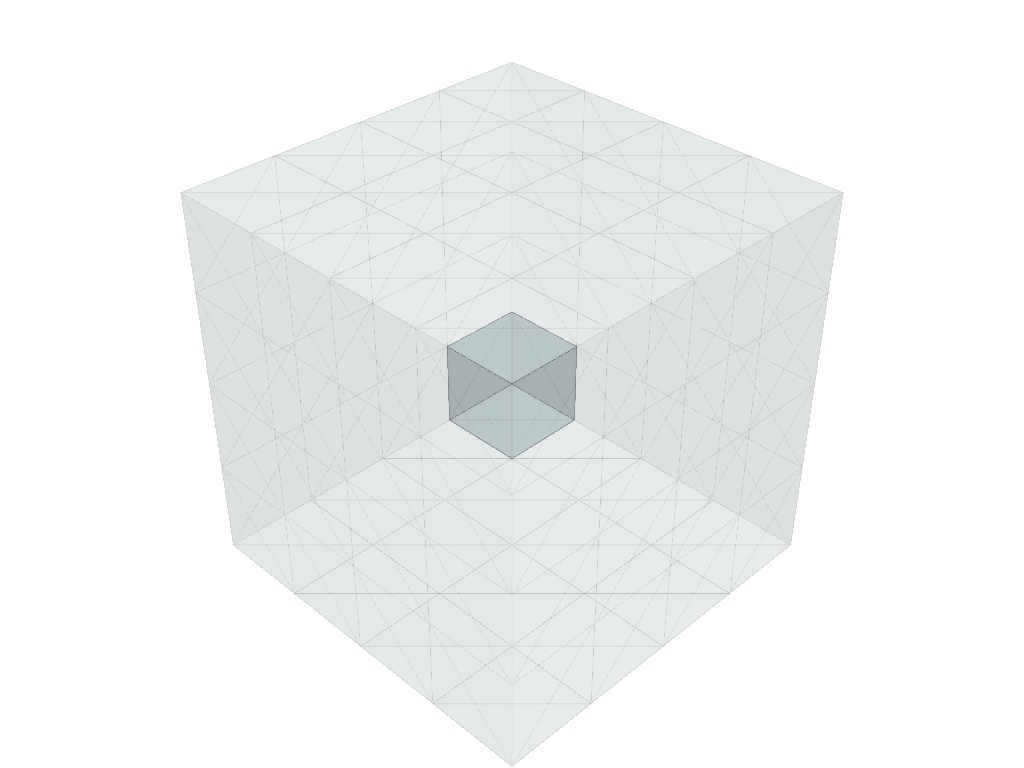

: 

In [107]:
cube = pv.Cube().triangulate().subdivide(2)
plotter = pv.Plotter()
clipped = pv.Box([0, 0.2, 0, 0.2, 0, 0.2])
plotter.add_mesh(cube, show_edges= True, opacity= 0.1)
plotter.add_mesh(clipped, show_edges= True, opacity = 0.2)
plotter.show()